# Fastai Classification

In this section of the code, we try to classify the paintings of 30 artists using fastai vision. At the same time, in order to improve the accuracy, we use the following methods to enrich the data of the training set: flip, rotate, contrast adjustment. We used a confusion matrix to represent the experimental results.

The final result of the experiment shows that val-loss is approximately equal to train-loss, showing that the training model has no overfitting. The accuracy of the test set reached more than 81%, which is higher than the VGG16-based model. We found that the paintings of the High Renaissance School were easy to classify. Through the display of the pictures, it was found that the genre was mostly portraits of religion and the court, and it was difficult for human experts to distinguish.

Import the packages need to use

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Display the dataset path

In [2]:
os.listdir('./')

['.ipynb_checkpoints',
 'artists.csv',
 'fastai2-25epoch.ipynb',
 'fastai2-Copy1.ipynb',
 'fastai2.ipynb',
 'image',
 'images',
 'tmp.pth']

Here we found that only 30 painters have more than 100 paintings identified as their paintings. Since the remaining painters have too few paintings, we decided to use only the top 30 painters in the subsequent data classification and research.

In [3]:
df = pd.read_csv('./artists.csv', index_col=False)
df = df.drop(['bio','wikipedia','id'], axis=1)
artist = df[['name','paintings','nationality']]
num_paintings = artist.sort_values(by = ['paintings'], ascending = False)
num_paintings = num_paintings.reset_index(drop = True)
print(num_paintings)

                         name  paintings               nationality
0            Vincent van Gogh        877                     Dutch
1                 Edgar Degas        702                    French
2               Pablo Picasso        439                   Spanish
3       Pierre-Auguste Renoir        336                    French
4              Albrecht Dürer        328                    German
5                Paul Gauguin        311                    French
6              Francisco Goya        291                   Spanish
7                   Rembrandt        262                     Dutch
8               Alfred Sisley        259            French,British
9                      Titian        255                   Italian
10               Marc Chagall        239  French,Jewish,Belarusian
11              Rene Magritte        194                   Belgian
12          Amedeo Modigliani        193                   Italian
13                  Paul Klee        188              German,S

Total 30 artists

In [4]:
os.listdir('./images')

['test', 'train']

Fastai Computer vision

The vision module of the fastai library contains all the necessary functions to define a Dataset and train a model for computer vision tasks. It contains four different submodules to reach that goal:

vision.image contains the basic definition of an Image object and all the functions that are used behind the scenes to apply transformations to such an object.

vision.transform contains all the transforms we can use for data augmentation.

vision.data contains the definition of ImageDataBunch as well as the utility function to easily build a DataBunch for Computer Vision problems.

vision.learner lets you build and fine-tune models with a pretrained CNN backbone or train a randomly initialized model from scratch.

Each of the four module links above includes a quick overview and examples of the functionality of that module, as well as complete API documentation. Below, we'll provide a walk-thru of end to end computer vision model training with the most commonly used functionality.

First, import everything we need from the fastai library.

In [5]:
from fastai.vision import *

Since this contains standard dataset folders, and each contains one folder per class, I can create a DataBunch in a single line

In [6]:
#data = ImageDataBunch.from_folder()

If I want to quickly get a set of random transforms that have proved to work well in a wide range of tasks, I should use the get_transforms function. The most important parameters to adjust are do_flip and flip_vert, depending on the type of images you have.

In [6]:
tfms = get_transforms(do_flip = True, 
                      flip_vert = True, 
                      max_rotate = 25, 
                      max_lighting = 0.2)

"In the fast.ai library we have imagenet_stats, cifar_stats and mnist_stats so we can add normalization easily with any of these datasets. Let's see an example with our dataset of choice: MNIST."

Thus, we use .normalize(imagenet_stats)

In [7]:
path = Path('./images')

data = ImageDataBunch.from_folder(path, 
                                  train = 'train',
                                  valid = 'test',
                                  ds_tfms = tfms,
                                  size = 224, # image size
                                  bs = 8, # batch size
                                  num_workers = 0).normalize(imagenet_stats) # normalization

Print all 30 classes

In [8]:
print('Classes')
print(data.classes)

Classes
['Albrecht_Du╠êrer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andy_Warhol', 'Diego_Velazquez', 'Edgar_Degas', 'Francisco_Goya', 'Frida_Kahlo', 'Giotto_di_Bondone', 'Gustav_Klimt', 'Henri_Matisse', 'Hieronymus_Bosch', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Pieter_Bruegel', 'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vincent_van_Gogh']


Show batches ensure all data import right

The picture has been flipped, which means that the number of selected training sets has been increased.

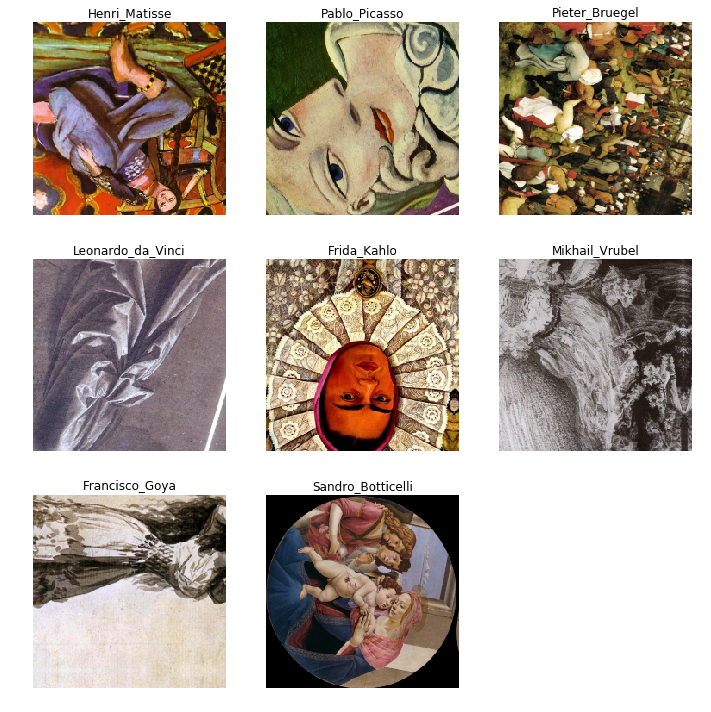

In [9]:
data.show_batch(rows = 3, cols = 3, figsize = (10,10))

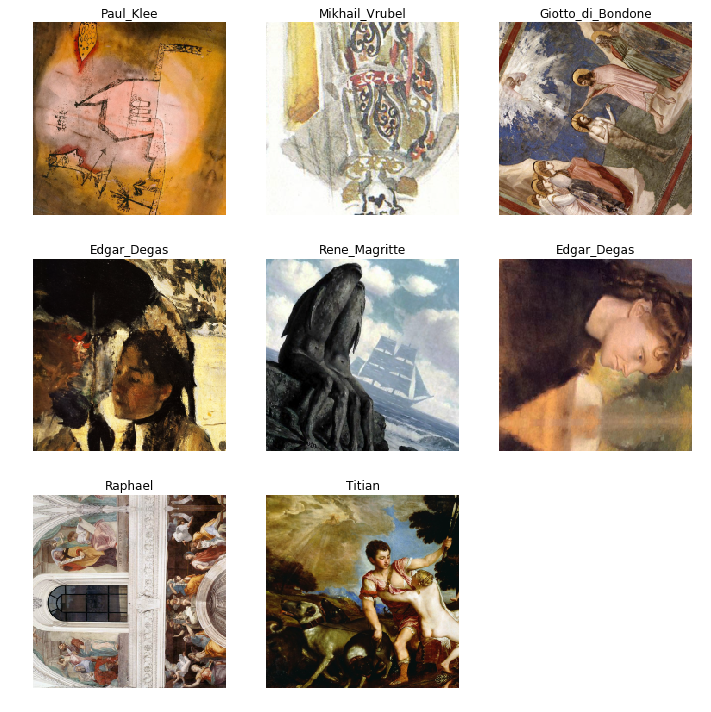

In [10]:
data.show_batch(rows = 3, cols = 3, figsize = (10,10))

Create CNN Vision Learner

vision.learner is the module that defines the cnn_learner method, to easily get a model suitable for transfer learning.

In [11]:
learn = cnn_learner(data,
                    models.resnet50, 
                    metrics = [accuracy],
                    model_dir = Path('./'),
                    path = Path('./'),
                    callback_fns = ShowGraph)

Start fit 2 epoches

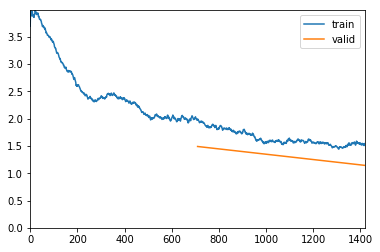

In [12]:
learn.fit_one_cycle(2)

Plot learning rate & loss

Explore lr from start_lr to end_lr over num_it iterations in learn. If stop_div, stops when loss diverges.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


<Figure size 432x432 with 0 Axes>

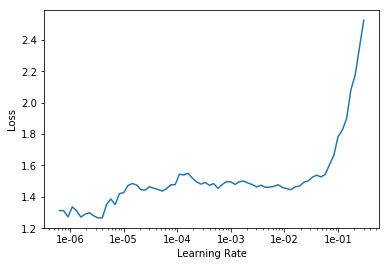

In [13]:
#learn.unfreeze()
learn.lr_find()
plt.figure(figsize = (6, 6))
learn.recorder.plot()

Then fit more epoches

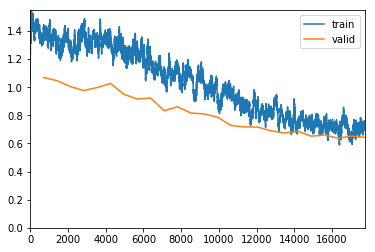

In [14]:
learn.fit_one_cycle(25)

Plot Confusion Matrix from leaner

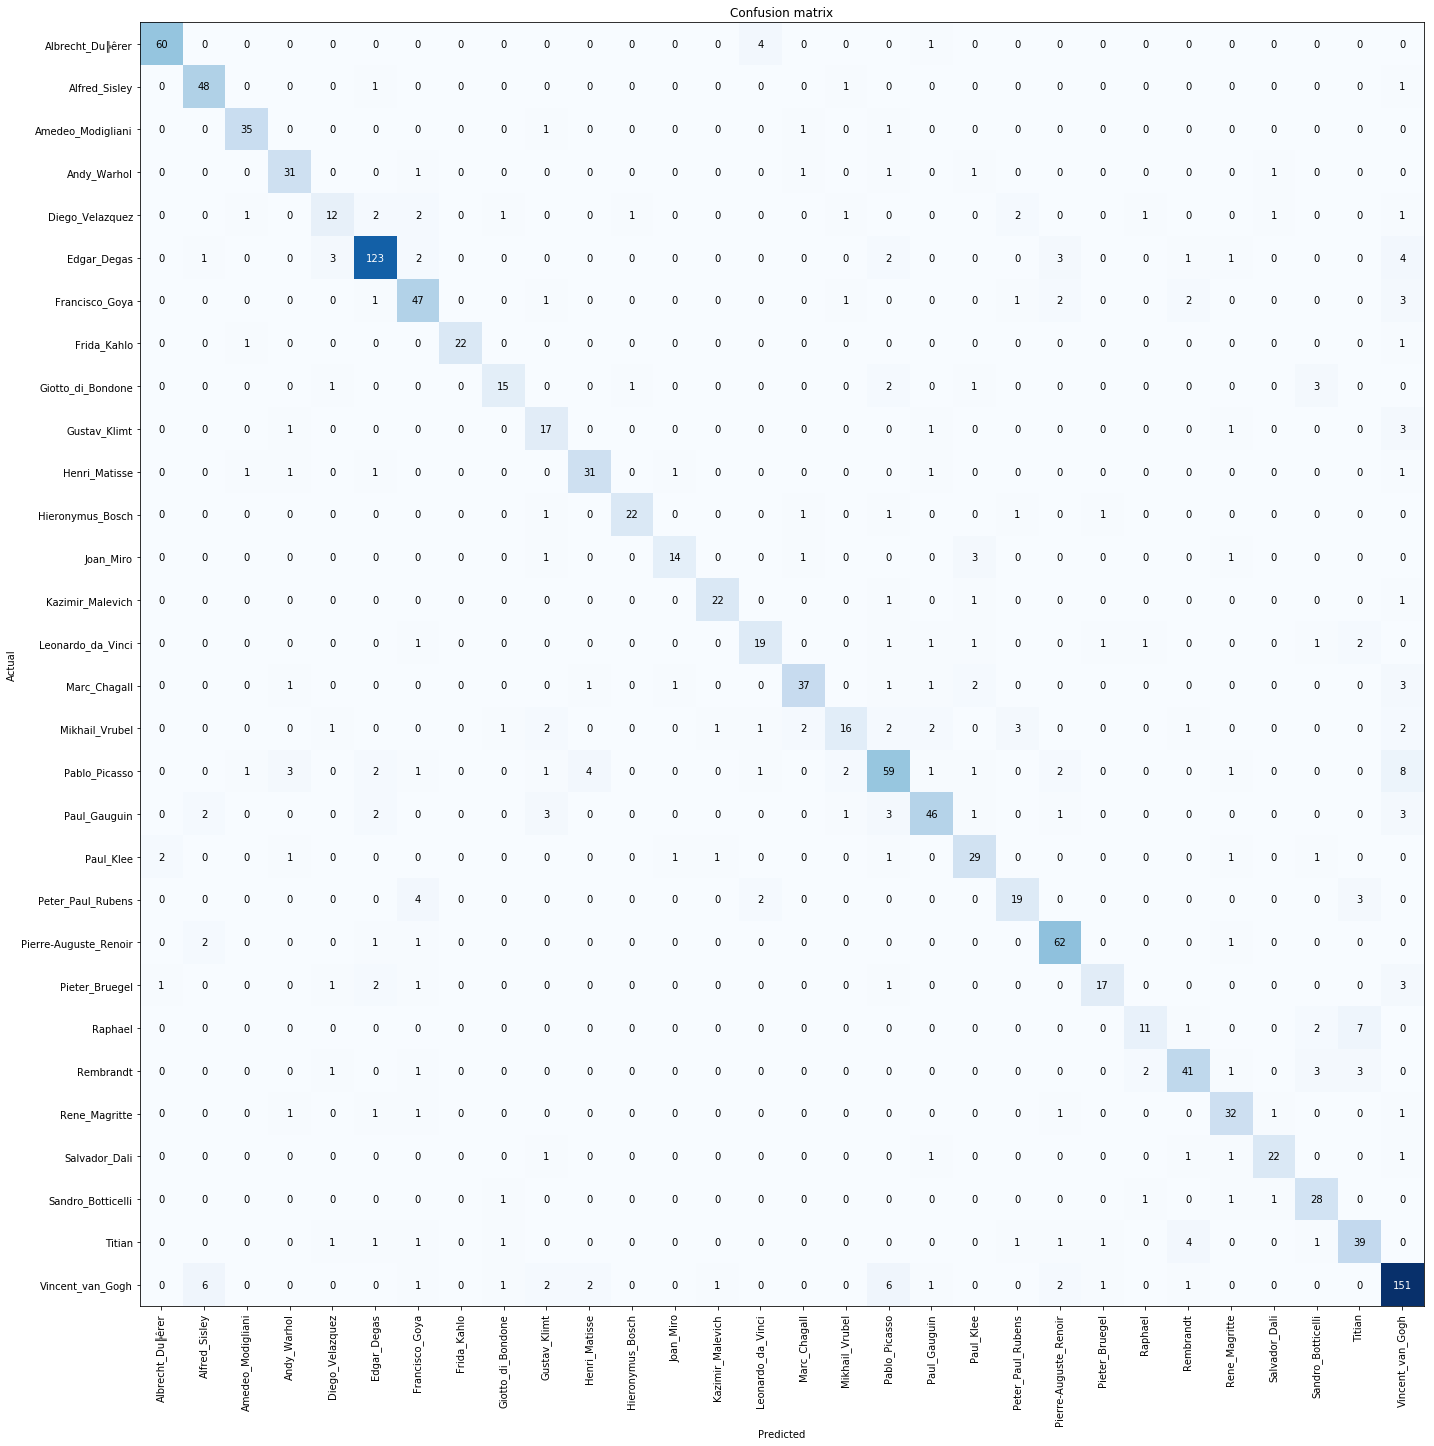

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(20,20))

In [16]:
interp.most_confused

<bound method ClassificationInterpretation.most_confused of <fastai.train.ClassificationInterpretation object at 0x0000024DB4F55860>>

In [17]:
interp.most_confused(slice_size=10)

[('Pablo_Picasso', 'Vincent_van_Gogh', 8),
 ('Raphael', 'Titian', 7),
 ('Vincent_van_Gogh', 'Alfred_Sisley', 6),
 ('Vincent_van_Gogh', 'Pablo_Picasso', 6),
 ('Albrecht_Du╠êrer', 'Leonardo_da_Vinci', 4),
 ('Edgar_Degas', 'Vincent_van_Gogh', 4),
 ('Pablo_Picasso', 'Henri_Matisse', 4),
 ('Peter_Paul_Rubens', 'Francisco_Goya', 4),
 ('Titian', 'Rembrandt', 4),
 ('Edgar_Degas', 'Diego_Velazquez', 3),
 ('Edgar_Degas', 'Pierre-Auguste_Renoir', 3),
 ('Francisco_Goya', 'Vincent_van_Gogh', 3),
 ('Giotto_di_Bondone', 'Sandro_Botticelli', 3),
 ('Gustav_Klimt', 'Vincent_van_Gogh', 3),
 ('Joan_Miro', 'Paul_Klee', 3),
 ('Marc_Chagall', 'Vincent_van_Gogh', 3),
 ('Mikhail_Vrubel', 'Peter_Paul_Rubens', 3),
 ('Pablo_Picasso', 'Andy_Warhol', 3),
 ('Paul_Gauguin', 'Gustav_Klimt', 3),
 ('Paul_Gauguin', 'Pablo_Picasso', 3),
 ('Paul_Gauguin', 'Vincent_van_Gogh', 3),
 ('Peter_Paul_Rubens', 'Titian', 3),
 ('Pieter_Bruegel', 'Vincent_van_Gogh', 3),
 ('Rembrandt', 'Sandro_Botticelli', 3),
 ('Rembrandt', 'Titian', 

In [20]:
interp.top_losses

<bound method ClassificationInterpretation.top_losses of <fastai.train.ClassificationInterpretation object at 0x000002530CC895C0>>

In [21]:
print(interp.top_losses)

<bound method ClassificationInterpretation.top_losses of <fastai.train.ClassificationInterpretation object at 0x000002530CC895C0>>


Result Analysis

Based on result of the 'interp.most_confused' function, we know there are 7 painting from Raphael misclassified to Titian, now we plot painting from these 2 artists.

As can be seen from the picture below, the two artists belong to the High Renaissance faction and the painting style is very similar. Even human experts can't tell.The High Renaissance School is similar in terms of portraits, mainly because of the prevalence of religious and court portraits at the time.

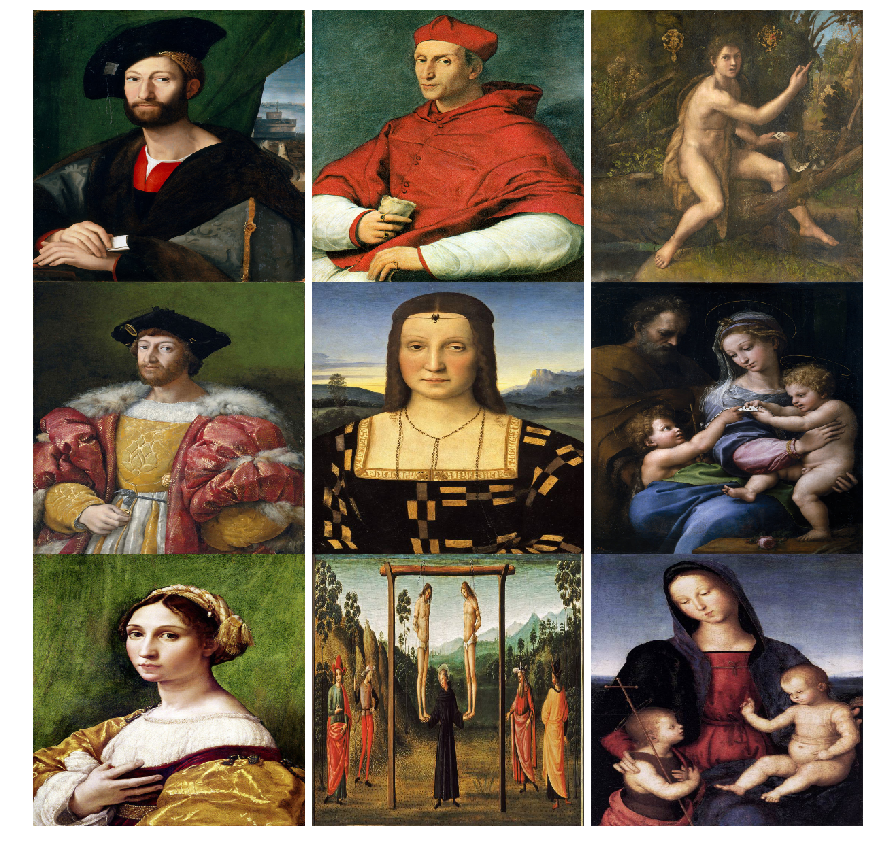

In [16]:
from glob import glob
def plot_img(artist):
    path = './image/' + artist + '/**'
    all_img = glob(path)
    plt.figure(figsize=(15,15))
    plt.subplots_adjust(wspace=0, hspace=0)
    i = 0
    for image in all_img[10:19]:
        img = cv2.imread(image)
        img = cv2.resize(img, (400, 400)) 
        plt.subplot(3, 3, i+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i += 1
plot_img('Raphael')

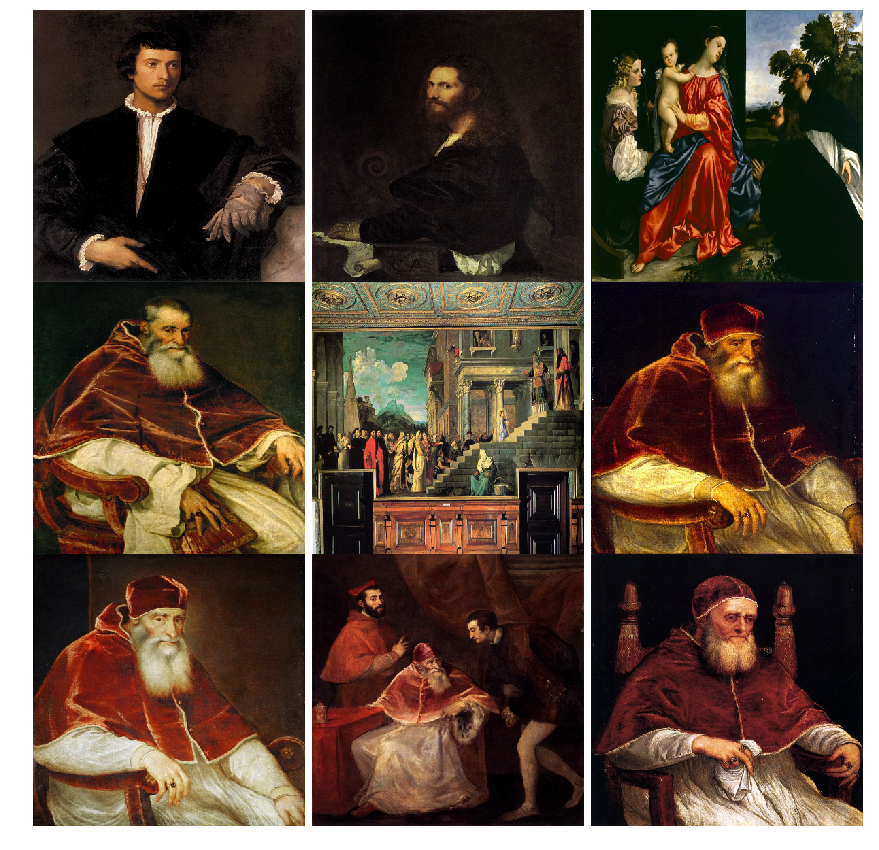

In [17]:
plot_img('Titian')